We are going to re-create a FiveThirtyEight analysis for this assignment.

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')
df %>% head(5)

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)

See spec(...) for full column specifications.



EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,⋯,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0


In [10]:
# bob = df %>%
#     pivot_longer(cols = -one_of('EPISODE', 'TITLE'), names_to = 'element', values_to = 'contained') %>%
#     group_by(element) %>%
#     summarize(count=sum(contained)) %>%
#     mutate_other(element, n=10)
# bob %>% head(5)

bob = df %>%
    pivot_longer(cols = -one_of('EPISODE', 'TITLE'), names_to = 'element', values_to = 'contained') %>%
    filter(contained>0) %>%
    mutate(element=fct_lump(element,n=10)) %>%
    mutate(element=fct_infreq(element))

bob %>% head(15)
    

EPISODE,TITLE,element,contained
<chr>,<chr>,<fct>,<dbl>
S01E01,"""A WALK IN THE WOODS""",BUSHES,1
S01E01,"""A WALK IN THE WOODS""",DECIDUOUS,1
S01E01,"""A WALK IN THE WOODS""",GRASS,1
S01E01,"""A WALK IN THE WOODS""",RIVER,1
S01E01,"""A WALK IN THE WOODS""",TREE,1
S01E01,"""A WALK IN THE WOODS""",TREES,1
S01E02,"""MT. MCKINLEY""",Other,1
S01E02,"""MT. MCKINLEY""",CLOUDS,1
S01E02,"""MT. MCKINLEY""",CONIFER,1


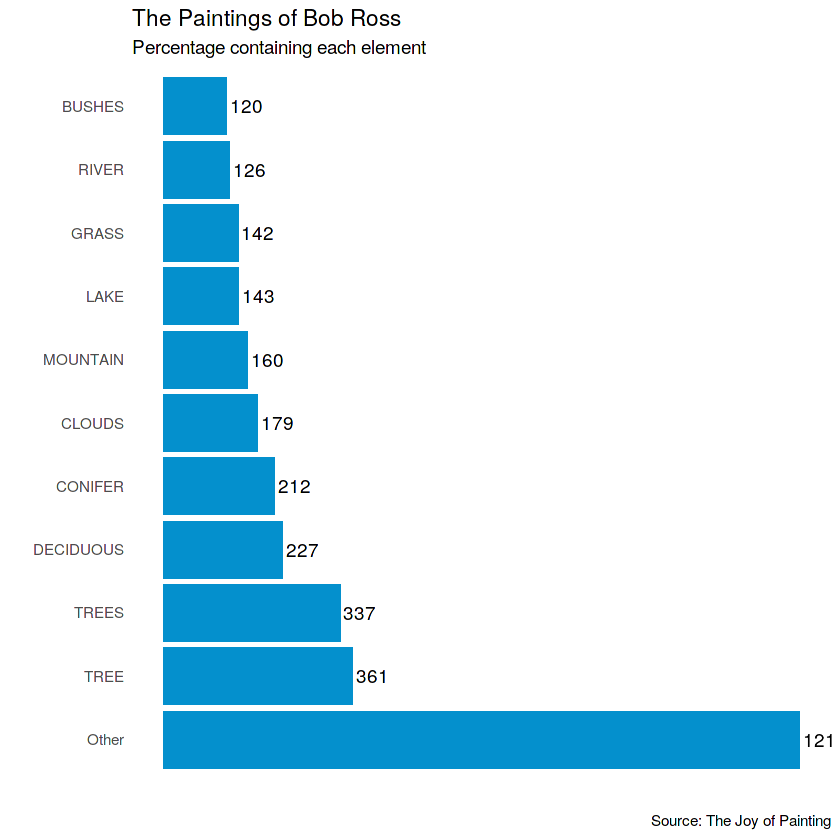

In [43]:
p = ggplot(bob, aes(x=element))
p = p + geom_bar(fill = "#0490CD")
p = p + coord_flip()
p = p + geom_text(stat='count', aes(label=..count..), hjust=-0.1)
p = p + theme(axis.text.x=element_blank())
# p = p + theme(axis.text.y=element_blank())
p = p + labs(title = "The Paintings of Bob Ross", 
             subtitle="Percentage containing each element", 
             caption="Source: The Joy of Painting",
             x="", 
             y="")
p = p + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.ticks = element_blank())
p

In [12]:
?fct_infreq